From the MIT at edX course; intro to programming with Python

In [1]:
import pylab as plt
# Note that this allows us to reference any library procedure as `plt.<procName>`


# Compound Interest and Retirement

We now use an example to put in practice plotting techniques together with functions.

Let's now define some functions for financial analysis.

In [2]:
def retire(monthly, rate, terms):
    ''' Calculates the compound interest of an investment
        Looking at retirement as the time horizon
        
        Inputs: 
            (i) monthly = monthly contributions to the investment
            (ii) rate = yearly interest rate
            (iii) terms = the number of years we want to calculate for
        
        Outputs: a base list and a savings list, which we may then plot
    '''
    savings = [0]
    base = [0]
    mRate = rate / 12  # Calculate the monthly interest rate
    
    for i in range(terms):
        base += [i]
        savings += [savings[-1] * (1 + mRate) + monthly]
        
    return base, savings

Of course we can define functions to plot data.

In [3]:
def displayRetireWMonthlies(monthlies, rate, terms):
    ''' Inputs:
        (i) monthlies: list of possible monthly contributions
        (ii) rate: yearly interest rate
        (iii) terms: number of months for the horizon 
                    (or years * 12)
    '''
    plt.figure('retireMonth')
    plt.clf()
    for monthly in monthlies:
        # First get our values from the previous function
        xvals, yvals = retire(monthly, rate, terms)
        # Then plot them
        plt.plot(xvals, yvals,
                 label = 'retire: $' + str(monthly))
        plt.xlabel("Number of months")
        plt.ylabel("Millions of $")
        plt.legend(loc = 'upper left')

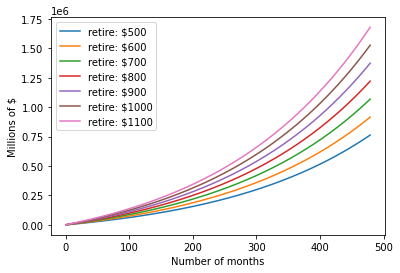

In [4]:
displayRetireWMonthlies([500, 600, 700, 800, 900,
1000, 1100], .05, 40 * 12)

So, different monthly contributions affect the outcome. But note that the difference is not as much as different interest rates:

In [5]:
def displayRetireWRates(month, rates, terms):
    ''' Inputs:
        (i) monthly contribution (single value)
        (ii) list of possible interest rates
        (iii) number of months
    '''
    plt.figure('retireRate')
    plt.clf()
    plt.xlabel("Number of months")
    plt.ylabel("Millions of $")
    
    for rate in rates:
        xvals, yvals = retire(month, rate, terms)
        plt.plot(xvals, yvals,
                 label = 'retire: m-contrib=$'+str(month)+ ': rate (% p.y.)=' + \
                         str(int(rate*100)))
        plt.legend(loc = 'upper left')

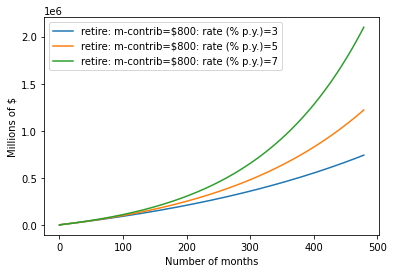

In [9]:
displayRetireWRates(800,[.03, .05, .07], 40*12)

We may also compare the size of both variables:

In [10]:
def displayRetireWMonthsAndRates(monthlies, rates, terms):
    plt.figure('retireBoth')
    plt.clf()
    plt.xlabel("Number of months")
    plt.ylabel("Millions of $")
    plt.xlim(30*12, 40*12)  # We will only plot the last 10 years
    for monthly in monthlies:
        for rate in rates:
            xvals, yvals = retire(monthly, rate, terms)
            plt.plot(xvals, yvals,
                     label = 'retire: m-contrib=$'+str(monthly)+ ': rate (% p.y.)' \
                             + str(int(rate*100)))
            plt.legend(loc = 'upper left')

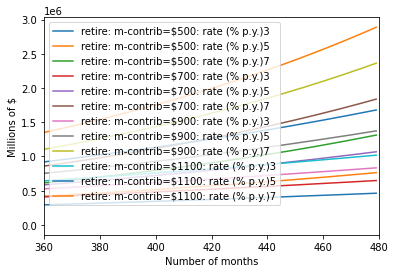

In [11]:
displayRetireWMonthsAndRates(
    [500, 700, 900, 1100],
    [.03, .05, .07],
    40 * 12)

Sure enough this is a very hard to read plot! Let's make it better with color and style codes.

In [12]:
def displayRetireWMonthsAndRates(monthlies, rates, terms):
    plt.figure('retireBoth')
    plt.clf()
    plt.xlim(30*12, 40*12)
    plt.xlabel("Number of months")
    plt.ylabel("Millions of $")
    
    monthLabels = ['r', 'b', 'g', 'k']
    rateLabels = ['-', 'o', '-']
                   
    for i in range(len(monthlies)):
        monthly = monthlies[i]
        monthLabel = monthLabels[i%len(monthLabels)]
        
        for j in range(len(rates)):
            rate = rates[j]
            rateLabel = rateLabels[j%len(rateLabels)]
            xvals, yvals = retire(monthly, rate, terms)
            plt.plot(xvals, yvals,
                     monthLabel+rateLabel,
                     label = 'retire: mc=$'+str(monthly)+ ': ir(p.y.)=%' \
                             + str(int(rate*100)))
            plt.legend(loc = 'upper left')

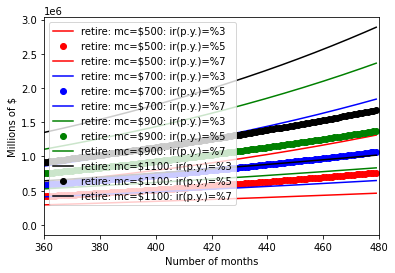

In [13]:
displayRetireWMonthsAndRates(
    [500, 700, 900, 1100], 
    [.03, .05, .07],
    40*12)